In [78]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [79]:
audit = pd.read_csv('audit_risk.csv')


In [80]:
audit.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [81]:
trial = pd.read_csv('trial.csv')

In [82]:
trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [83]:
print("Shape of audit dataset",audit.shape)
print("shape of trial dataset",trial.shape)

Shape of audit dataset (776, 27)
shape of trial dataset (776, 18)


In [84]:
audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [85]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [86]:
# number of unique values
audit.nunique()

Sector_score       13
LOCATION_ID        45
PARA_A            363
Score_A             3
Risk_A            363
PARA_B            358
Score_B             3
Risk_B            360
TOTAL             471
numbers             5
Score_B.1           3
Risk_C              5
Money_Value       328
Score_MV            3
Risk_D            328
District_Loss       3
PROB                3
RiSk_E              5
History             7
Prob                3
Risk_F              7
Score              17
Inherent_Risk     584
CONTROL_RISK       11
Detection_Risk      1
Audit_Risk        601
Risk                2
dtype: int64

In [87]:
# number of unique values
trial.nunique()

Sector_score      13
LOCATION_ID       45
PARA_A           363
SCORE_A            3
PARA_B           358
SCORE_B            3
TOTAL            471
numbers            5
Marks              3
Money_Value      328
MONEY_Marks        3
District           3
Loss               3
LOSS_SCORE         3
History            7
History_score      3
Score             17
Risk               2
dtype: int64

# Check Missing value 

In [88]:
#checking for missing values
audit.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [89]:
#checking for missing values
trial.isnull().sum() 

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [90]:
# get money_value data
Money_Value = audit['Money_Value']


In [91]:
median = audit["Money_Value"].median()
audit["Money_Value"].fillna(median, inplace=True)

In [92]:
audit.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [93]:
#checking for missing values
audit.isnull().sum() 

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [94]:
median = trial["Money_Value"].median()
trial["Money_Value"].fillna(median, inplace=True)

In [95]:
#checking for missing values
trial.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [96]:
# Removing duplicate rows
audit=audit.drop_duplicates(keep='first')
trial=trial.drop_duplicates(keep='first')

In [97]:
# Renaming columns of trial column
trial.columns = ['Sector_score','LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',  'TOTAL', 
                 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 
                 'History', 'History_score', 'Score', 'Risk_trial']

In [98]:
audit_columns = set(audit.columns)
trial_columns = set(trial.columns)

In [99]:
audit_columns.intersection(trial.columns)

{'History',
 'LOCATION_ID',
 'Money_Value',
 'PARA_A',
 'PARA_B',
 'Score',
 'Score_A',
 'Score_B',
 'Sector_score',
 'TOTAL',
 'numbers'}

In [100]:
# Merging 
df_audit = audit.merge(trial, how = 'inner', on = ['History', 'LOCATION_ID', 'Money_Value','PARA_A','PARA_B','Sector_score','TOTAL','numbers'], sort = False)
df_audit = df_audit.reindex(sorted(df_audit.columns), axis=1)

In [101]:
df_audit["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [102]:
# Dropping the string values
df_audit=df_audit[~df_audit.LOCATION_ID.str.contains("LOHARU")]
df_audit=df_audit[~df_audit.LOCATION_ID.str.contains("NUH")]
df_audit=df_audit[~df_audit.LOCATION_ID.str.contains("SAFIDON")]
df_audit['LOCATION_ID'] = df_audit['LOCATION_ID'].astype(float)

In [103]:
df_audit["LOCATION_ID"].unique()

array([23.,  6.,  7.,  8., 13., 37., 24.,  3.,  4., 14.,  5., 20., 19.,
       21., 22.,  9., 11., 12., 29., 30., 38., 31.,  2., 32., 16., 33.,
       15., 36., 34., 18., 25., 39., 27., 35., 40., 41., 42.,  1., 28.,
       43., 44., 17.])

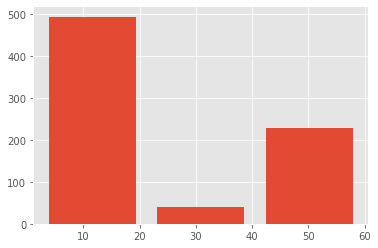

<Figure size 432x288 with 0 Axes>

In [104]:
Sector_score =df_audit['Sector_score']
plt.hist(Sector_score , bins=3 , rwidth=0.8)
plt.show()
plt.savefig('Sector_score.png')

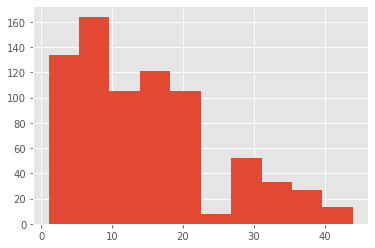

<Figure size 432x288 with 0 Axes>

In [105]:
LOCATION_ID = df_audit['LOCATION_ID']
plt.hist(LOCATION_ID)
plt.show()
plt.savefig('LOCATION_ID.png')

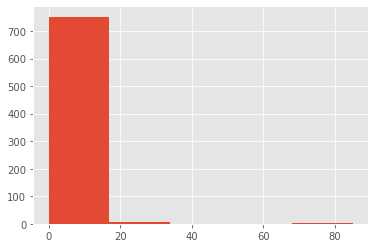

<Figure size 432x288 with 0 Axes>

In [106]:
PARA_A = df_audit["PARA_A"]
plt.hist(PARA_A ,bins=5 , rwidth=2)
plt.show()
plt.savefig('PARA_A.png')

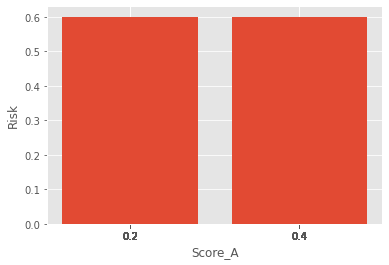

<Figure size 432x288 with 0 Axes>

In [107]:
Score_A = df_audit["Score_A_x"]
Risk = df_audit["Risk"]
plt.xticks(Risk ,Score_A)
plt.ylabel("Risk")
plt.xlabel("Score_A")
plt.bar(Risk,Score_A)
plt.show()
plt.savefig('Score_A.png')

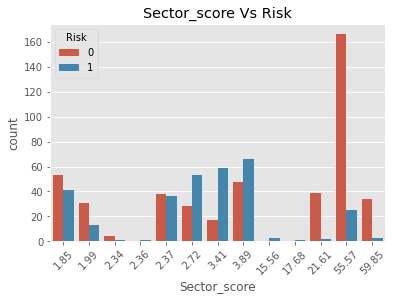

<Figure size 432x288 with 0 Axes>

In [108]:
sns.countplot(x='Sector_score',data=df_audit[['Sector_score','Risk']],hue="Risk").set_title("Sector_score Vs Risk")
plt.xticks(rotation=45)
plt.show()
plt.savefig('Sector_score Vs Risk.png')

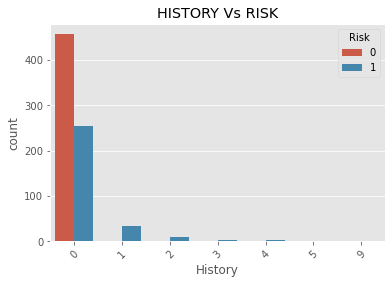

<Figure size 432x288 with 0 Axes>

In [109]:
sns.countplot(x='History',data=df_audit[['History','Risk']],hue="Risk").set_title("HISTORY Vs RISK")
plt.xticks(rotation=45)
plt.show()
plt.savefig('HISTORY Vs RISK.png')

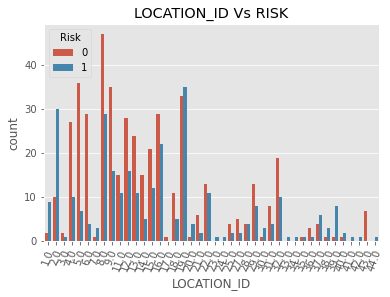

<Figure size 432x288 with 0 Axes>

In [110]:
sns.countplot(x='LOCATION_ID',data=df_audit[['LOCATION_ID','Risk']],hue="Risk").set_title("LOCATION_ID Vs RISK")
plt.xticks(rotation=70)
plt.show()
plt.savefig('LOCATION_ID Vs RISK.png')

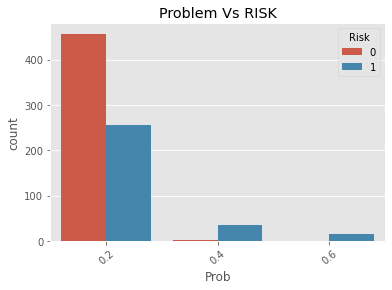

<Figure size 432x288 with 0 Axes>

In [111]:
sns.countplot(x='Prob',data=df_audit[['Prob','Risk']],hue="Risk").set_title("Problem Vs RISK")
plt.xticks(rotation=40)
plt.show()
plt.savefig('Problem Vs RISK.png')

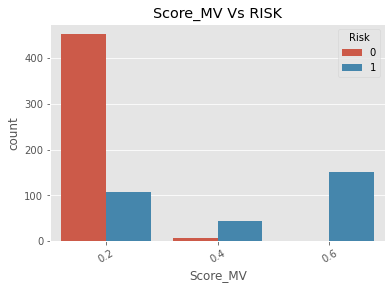

<Figure size 432x288 with 0 Axes>

In [112]:
sns.countplot(x='Score_MV',data=df_audit[['Score_MV','Risk']],hue="Risk").set_title("Score_MV Vs RISK")
plt.xticks(rotation=30)
plt.show()
plt.savefig('Score_MV Vs RISK.png')

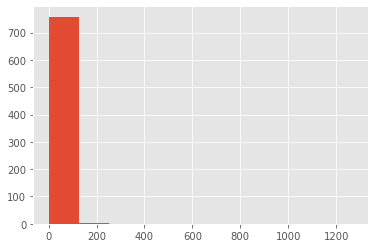

<Figure size 432x288 with 0 Axes>

In [113]:
TOTAL = df_audit["TOTAL"]
plt.hist(TOTAL)
plt.show()
plt.savefig('TOTAL.png')

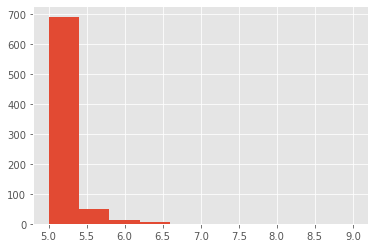

<Figure size 432x288 with 0 Axes>

In [114]:
numbers = df_audit["numbers"]
plt.hist(numbers)
plt.show()
plt.savefig('TOTAL.png')

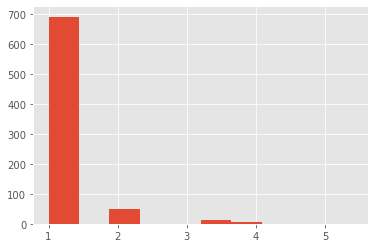

<Figure size 432x288 with 0 Axes>

In [115]:
Risk_C = df_audit["Risk_C"]
plt.hist(Risk_C  )
plt.show()
plt.savefig('Risk_C.png')

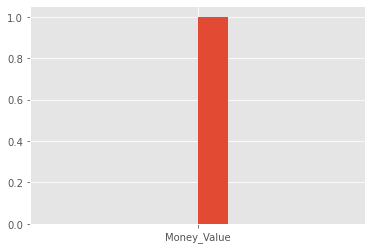

<Figure size 432x288 with 0 Axes>

In [116]:
Money_Value = df_audit['Money_Value']
plt.hist('Money_Value')
plt.show()
plt.savefig('Money_Value.png')

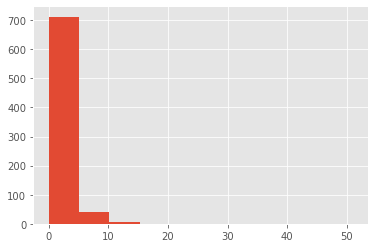

<Figure size 432x288 with 0 Axes>

In [117]:
Risk_A = df_audit["Risk_A"]
plt.hist(Risk_A , bins=10 , rwidth= 1)
plt.show()
plt.savefig('Risk_A.png')

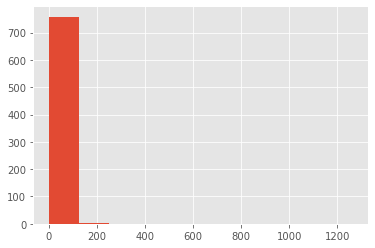

<Figure size 432x288 with 0 Axes>

In [118]:
PARA_B = df_audit ["PARA_B"]
plt.hist(PARA_B)
plt.show()
plt.savefig('PARA_B.png')

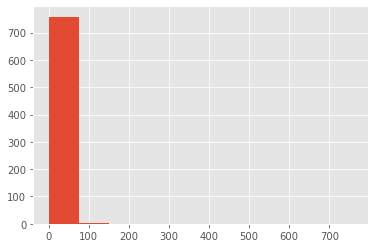

<Figure size 432x288 with 0 Axes>

In [119]:
Risk_B = df_audit["Risk_B"]
plt.hist(Risk_B)
plt.show()
plt.savefig('Risk_B.png')

# Correlation check

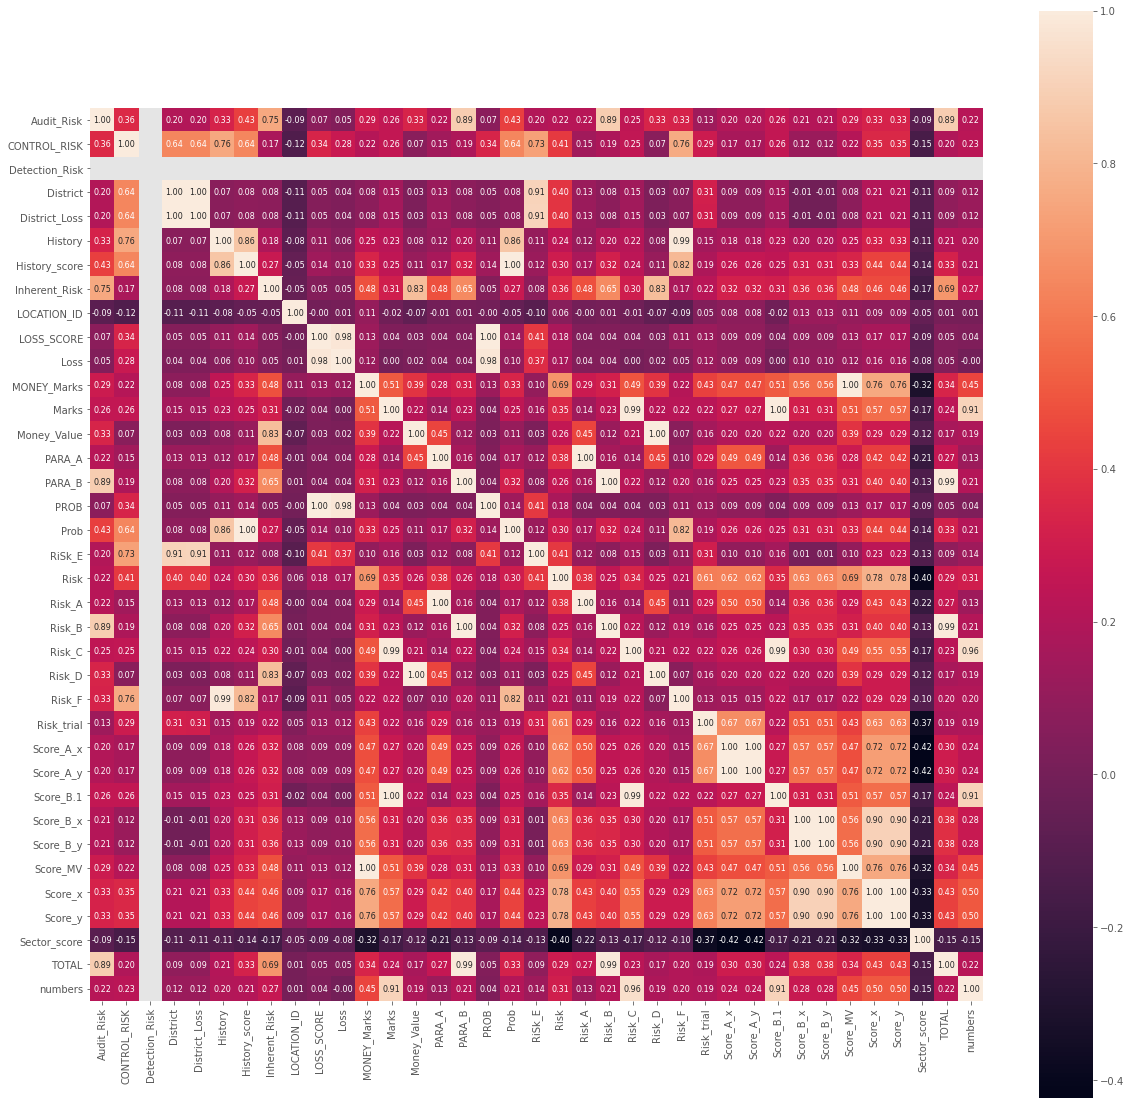

<Figure size 432x288 with 0 Axes>

In [120]:
correlation = df_audit.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)
plt.show()
plt.savefig('correlation.png')

In [121]:
df_audit['Detection_Risk'].value_counts()

0.5    762
Name: Detection_Risk, dtype: int64

In [122]:
df_audit = df_audit.drop(['Detection_Risk'], axis = 1)

In [123]:
df_audit = df_audit.drop(['LOCATION_ID','RiSk_E','Risk_F','Score_x','Inherent_Risk','CONTROL_RISK','Audit_Risk'], axis = 1)

<AxesSubplot:>

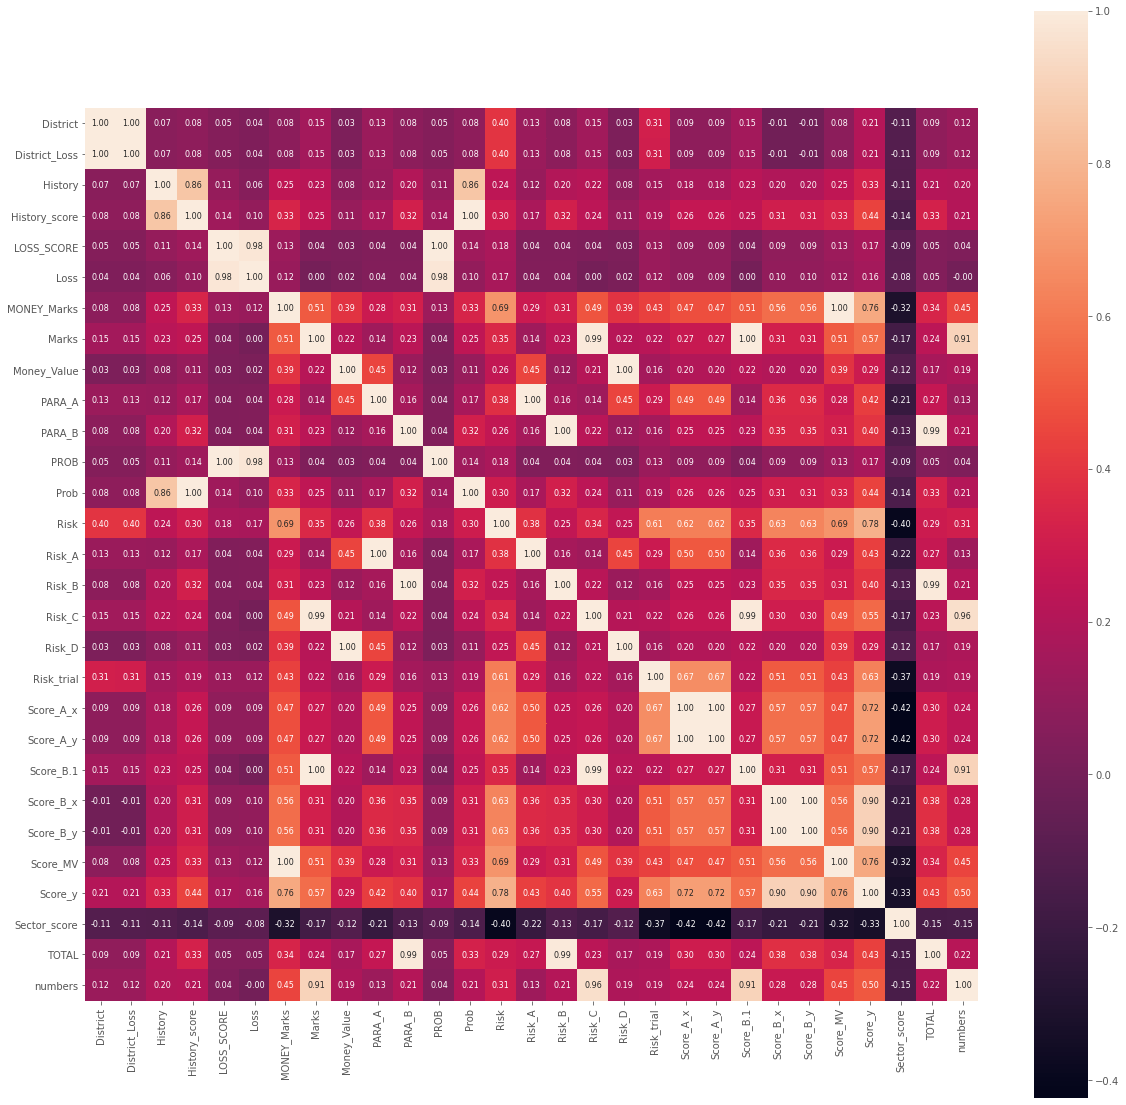

In [124]:
correlation = df_audit.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)

In [125]:
df_audit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 764
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District       762 non-null    int64  
 1   District_Loss  762 non-null    int64  
 2   History        762 non-null    int64  
 3   History_score  762 non-null    int64  
 4   LOSS_SCORE     762 non-null    int64  
 5   Loss           762 non-null    int64  
 6   MONEY_Marks    762 non-null    int64  
 7   Marks          762 non-null    int64  
 8   Money_Value    762 non-null    float64
 9   PARA_A         762 non-null    float64
 10  PARA_B         762 non-null    float64
 11  PROB           762 non-null    float64
 12  Prob           762 non-null    float64
 13  Risk           762 non-null    int64  
 14  Risk_A         762 non-null    float64
 15  Risk_B         762 non-null    float64
 16  Risk_C         762 non-null    float64
 17  Risk_D         762 non-null    float64
 18  Risk_trial

In [126]:
df_audit = df_audit.drop(['District_Loss','PROB','Score_y','numbers'], axis = 1)

In [127]:
df_audit = df_audit.drop(['MONEY_Marks' ], axis = 1)

In [128]:
df_audit = df_audit.drop(['Score_MV' ], axis = 1)

In [129]:
df_audit.head()

,District,History,History_score,LOSS_SCORE,Loss,Marks,Money_Value,PARA_A,PARA_B,Prob,...,Risk_C,Risk_D,Risk_trial,Score_A_x,Score_A_y,Score_B.1,Score_B_x,Score_B_y,Sector_score,TOTAL
0,2,0,2,2,0,2,3.38,4.18,2.50,0.2,...,1.0,0.676,1,0.6,6,0.2,0.2,2,3.89,6.68
1,2,0,2,2,0,2,0.94,0.00,4.83,0.2,...,1.0,0.188,0,0.2,2,0.2,0.2,2,3.89,4.83
2,2,0,2,2,0,2,0.00,0.51,0.23,0.2,...,1.0,0.000,0,0.2,2,0.2,0.2,2,3.89,0.74
3,2,0,2,2,0,6,11.75,0.00,10.80,0.2,...,3.6,7.050,1,0.2,2,0.6,0.6,6,3.89,10.80
4,2,0,2,2,0,2,0.00,0.00,0.08,0.2,...,1.0,0.000,0,0.2,2,0.2,0.2,2,3.89,0.08


# Data Transformation
#Split Data into train and test data

In [130]:
x = df_audit.drop(["Risk"], axis = 1)
y=  df_audit["Risk"]

In [131]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [132]:
#feature Scalling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test  = scaler.transform(X_test_org)

In [133]:
print("Size of training set: {}      size of test set: {}\n".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 571      size of test set: 191



# Data Modeling
## Linear Regression


In [134]:
#for LINEAR Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
print('Train score: %.4f'%linreg.score(X_train,y_train))


Train score: 0.7008


In [135]:
print('Test score: %.4f'%linreg.score(X_test,y_test))

Test score: 0.4704


In [136]:
 y_pred_lin = linreg.predict(X_train)
 print('predicted response:', y_pred_lin, sep='\n')
 print("Average predict response: {:.2f}".format(y_pred_lin.mean()))

predicted response:
[ 3.38900080e-01  1.17436252e+00  4.52163322e-01  6.21905600e-01
  7.23584865e-01  3.25930183e-01  1.56576829e-01  1.74503511e-01
  1.38174081e-01  3.27059544e-01  5.74797734e-01  1.30259149e-01
  1.63393864e-01 -8.34971777e-02  6.93958349e-02 -5.10163242e-02
  2.26421669e-02  8.16796194e-01  7.17763040e-02  1.33164687e-01
  3.36706482e-01  1.78597961e-01  3.52463984e-01  1.01387960e-02
  5.52583174e-02 -6.18670099e-03  4.95896104e-01  1.84744448e-01
  8.65894681e-01  1.35923480e-01  9.04884012e-01  6.53484037e-02
  1.37709949e-01  6.35687292e-02  9.94677715e-02 -2.47470271e-02
  4.10861315e-02 -5.64079385e-02 -4.95301273e-02  3.30754639e-01
  3.21835398e-01  8.24100233e-01  2.58695505e-02  1.50768935e-01
  2.03574635e-01  7.30018619e-01  6.18485515e-01  7.02085899e-02
 -2.47470271e-02  6.38126807e-01  3.17537214e-01  9.39581605e-01
  8.48143586e-01  6.06910104e-01  8.26966791e-01  5.13499039e-01
  2.87537774e-02  1.36515862e-02  8.39627978e-01  2.88595086e-01
  3.7

In [137]:
from sklearn.metrics import mean_squared_error
lin_train_mse = mean_squared_error( y_train,y_pred_lin )
print('Train mse :',lin_train_mse)


Train mse : 0.07187211202942602


In [138]:
Lin_train_rmse = np.sqrt(lin_train_mse)
print( 'Train Rmse :' ,Lin_train_rmse)

Train Rmse : 0.2680897462220926


In [139]:
 y_pred_test_lin = linreg.predict(X_test)
 print('test predicted response:', y_pred_test_lin, sep='\n')
 print("Average test predict response: {:.2f}".format(y_pred_test_lin.mean()))
 

test predicted response:
[-2.43990593e-02  1.28575929e-01  1.28110281e-02  4.76286526e-01
  4.44678949e-01  8.88659096e-01  3.14609219e-01  4.12147404e+00
  2.48564109e-01  1.46696917e-01  8.30772688e-01  9.44232344e-03
  1.84463305e-02  1.32912517e-01 -1.33764610e-01 -1.64838225e-02
  9.03780296e-01 -6.16617979e-02 -8.87588371e-02  6.71447849e-02
 -3.65682108e-02 -3.91951405e-02  1.59514619e-02  1.63714404e-01
  3.44336828e-02 -2.47470271e-02  2.04355360e-01  1.52642327e-01
  6.79220253e-01 -5.29610666e-02  6.96806449e-01  4.95311126e-01
  9.31563570e-01  3.21296585e-01  3.29304453e-01 -3.35660408e-02
 -5.23297890e-02  1.56116911e-01  8.85660919e-01  7.11395796e-01
  1.48628906e-02  2.42793722e-01  3.17534959e-01  1.63807557e-01
 -2.47470271e-02  1.26475507e+00  9.27708348e-01  3.09274488e-01
 -4.51042789e-02  5.77462966e-01  4.73434477e-01  4.37441553e-01
 -2.77461660e-02  5.03180782e-01  7.40205416e-02  9.46290384e-01
  4.04069292e-01  2.67133098e-01  3.71590468e-01 -1.35078075e-01


In [140]:
lin_test_mse = mean_squared_error( y_test,y_pred_test_lin )
print('Test mse : ',lin_test_mse)

Test mse :  0.12629937934027605


In [141]:
Lin_test_rmse = np.sqrt(lin_test_mse)
print('Test Rmse : ' ,Lin_test_rmse)

Test Rmse :  0.3553862396608457


# # Decission treee


In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Create Decision Tree classifer object
dec = DecisionTreeClassifier()

In [143]:
# Train Decision Tree Classifer
dec = dec.fit(X_train,y_train)

In [144]:
#Predict the response for test dataset
y_pred_test_dec = dec.predict(X_test)

In [145]:
print(" Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test_dec))

 Testing Accuracy: 0.9947643979057592


In [146]:
#Predict the response for training dataset
y_pred_train_dec = dec.predict(X_train)

In [147]:
print(" Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train_dec))

 Training Accuracy: 1.0


# # Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier
Ranfoclf =RandomForestClassifier(n_estimators=100)


In [149]:
Ranfoclf.fit(X_train,y_train)
y_pred_Ranfoclf_test =Ranfoclf.predict(X_test)

In [150]:
print(" Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_Ranfoclf_test))

 Testing Accuracy: 0.9842931937172775


In [151]:
y_pred_Ranfoclf_train =Ranfoclf.predict(X_train)

In [152]:
print(" Training Accuracy:",metrics.accuracy_score(y_train, y_pred_Ranfoclf_train))

 Training Accuracy: 1.0
